### 用matplotlib实现图像的拼接

这种方法还算简单，经常会在绘制图的时候使用，但是也可以显示图片，我把它写成只显示两行图片，如果你想要多行，按照下面改一下相关的参数即可
不足之处：

不能够无缝拼接，图片之间是有空隙的
优点：

不用更改图片的尺寸，图片之间的尺寸大小可以不一致

261
262
263
264
265
266
267
268
269
2610


ValueError: Single argument to subplot must be a three-digit integer, not 2610

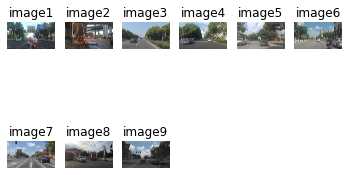

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import re


def plt_images_wall(img_path):
    imgs_path = []
    imgs_name = os.listdir(img_path)

    for img in imgs_name:
        imgs_path.append(os.path.join(img_path + "/", img))

    if int(len(imgs_path) / 2) != 0:   # 想要显示多行图片更改一下就可以

        for i in range(len(imgs_path)):
            print(int(str(2) + str(int(len(imgs_path) / 2)) + str(i + 1)))
			# 引入正则是为了解决浮点数的错误问题
            tmp = str(int(len(imgs_path) / 2))
            tmp = re.match("[0-9]", tmp)
            tmp = tmp.string

            plt.subplot(int(str(2) + str(tmp) + str(i + 1)))
            plt.title("image" + str((i + 1)))
            plt.axis("off")   # 如果想要显示坐标轴，把这行代码注释即可
            plt.imshow(Image.open(imgs_path[i]))
        plt.savefig("plt_wall.jpg")

    plt.show()


plt_images_wall("/home/bu/mmgeneration-master/work_dirs/try_trans_copy")


# PIL实现照片墙拼接

使用说明：

你可以通过设置，只显示行或者只显示列都是可以的

In [35]:
__Author__ = 'Shliang'

import PIL.Image as Image
from PIL import Image, ImageDraw, ImageFont

import os

IMAGES_PATH = '/home/bu/mmgeneration-master/work_dirs/try_trans_copy/'  # 图片集地址
IMAGES_FORMAT = ['.jpg', '.JPG']  # 图片格式
# IMAGE_SIZE = 256  # 每张小图片的大小
IMAGE_ROW = 2  # 图片间隔，也就是合并成一张图后，一共有几行
IMAGE_COLUMN = 6  # 图片间隔，也就是合并成一张图后，一共有几列

# 获取图片集地址下的所有图片名称
image_names = [name for name in os.listdir(IMAGES_PATH) for item in IMAGES_FORMAT if
               os.path.splitext(name)[1] == item]
print(image_names)

# 简单的对于参数的设定和实际图片集的大小进行数量判断
if len(image_names) != IMAGE_ROW * IMAGE_COLUMN:
    raise ValueError("合成图片的参数和要求的数量不能匹配！")


image_heiht, image_width = Image.open(IMAGES_PATH + image_names[0]).size


# 定义图像拼接函数
def image_compose():
    # to_image = Image.new('RGB', (IMAGE_COLUMN * IMAGE_SIZE, IMAGE_ROW * IMAGE_SIZE))  # 创建一个新图
    to_image = Image.new('RGB', (IMAGE_COLUMN * image_heiht, IMAGE_ROW * image_width))  # 创建一个新图

    text = ["原图", "增强亮度", "增强对比度", "锐化"]

    # 循环遍历，把每张图片按顺序粘贴到对应位置上
    for y in range(1, IMAGE_ROW + 1):
        for x in range(1, IMAGE_COLUMN + 1):
            from_image = Image.open(IMAGES_PATH + image_names[IMAGE_COLUMN * (y - 1) + x - 1])  #.resize((IMAGE_SIZE, IMAGE_SIZE), Image.ANTIALIAS)
            # typeface = ImageFont.truetype('xindexingcao57.ttf', 60)  # 参数： 字体  字体大小


            draw = ImageDraw.Draw(from_image)
            # typeface = ImageFont.truetype('STKAITI.TTF', 40)  # 参数： 字体  字体大小  STXINGKA.TTF

            draw.text((20,550), image_names[IMAGE_COLUMN * (y - 1) + x - 1] , fill=(255, 0, 0))
            to_image.paste(from_image, ((x - 1) * image_heiht, (y - 1) * image_width))
    return to_image.save("/home/bu/mmgeneration-master/work_dirs/demos/result_car_demos.jpg")  # 保存新图

image_compose()

['HT_TRAIN_000370_SH_000.jpg', 'HT_TRAIN_000372_SH_000.jpg', 'HT_TRAIN_000373_SH_000.jpg', 'HT_TRAIN_000380_SH_000.jpg', 'HT_TRAIN_000382_SH_000.jpg', 'HT_TRAIN_000383_SH_000.jpg', 'HT_TRAIN_000384_SH_000.jpg', 'HT_TRAIN_000385_SH_000.jpg', 'HT_TRAIN_000386_SH_000.jpg', 'HT_VAL_000121_SH_010.jpg', 'HT_VAL_000102_SZ_010.jpg', 'HT_VAL_000112_SH_230.jpg']
